Importing the necessary dependencies

In [15]:
import tensorflow as tf
import os                       
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from PIL import Image            
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#mounting colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing the data

Going through the data

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 16
CHANNEL = 3


In [7]:
data_dir = '/content/drive/MyDrive/leaf_data'
train_dir = data_dir + "/train"
valid_dir = data_dir + "/val"
diseases = os.listdir(train_dir)

In [8]:
print(diseases)

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Pepper,_bell___healthy', 'Grape___healthy', 'Potato___healthy', 'Potato___Late_blight', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot']


In [9]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 16


In [10]:
plants = []
Num_Of_Diseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
        
    if plant.split('___')[1] != 'healthy':
           Num_Of_Diseases += 1

In [12]:
print(f"Unique Plants are: \n{plants}")
print("Total number of plants: {}".format(len(plants)))
print("Total number of diseases: {}".format(Num_Of_Diseases))

Unique Plants are: 
['Grape', 'Pepper,_bell', 'Potato', 'Apple', 'Corn_(maize)']
Total number of plants: 5
Total number of diseases: 11


In [13]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot),753
"Pepper,_bell___Bacterial_spot",697
Potato___Early_blight,700
Grape___Esca_(Black_Measles),968
"Pepper,_bell___healthy",1034
Grape___healthy,296
Potato___healthy,106
Potato___Late_blight,700
Apple___Apple_scab,441
Apple___Black_rot,434


Text(0.5, 1.0, 'Images per each class of plant disease')

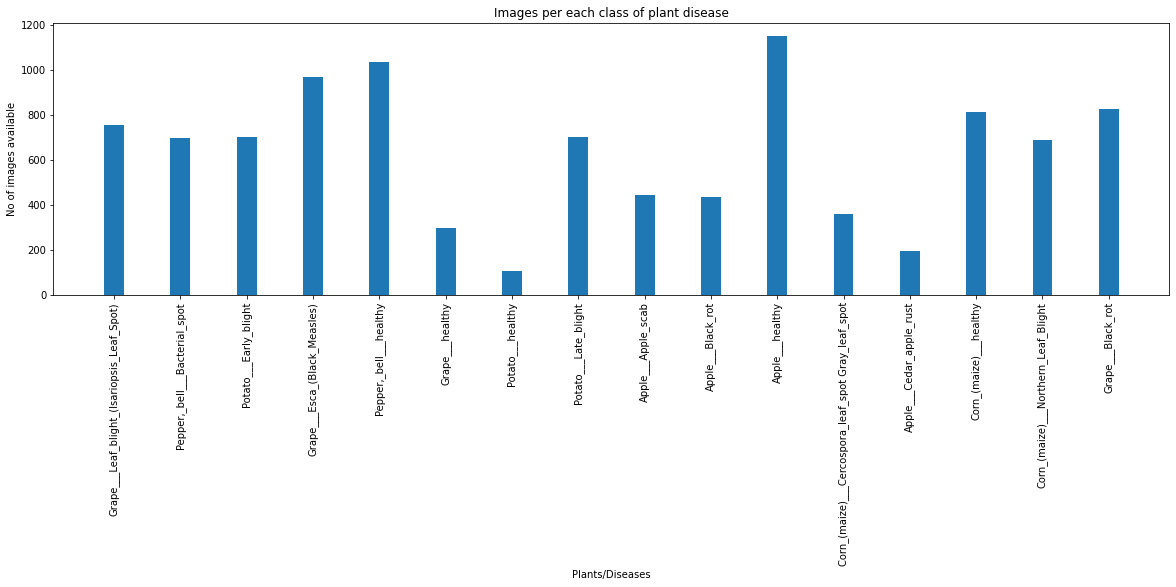

In [16]:
# plotting number of images available for each disease
index = [n for n in range(16)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

Using Image data generator for data augmentation of the dataset

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train data generator
tr_datagen = ImageDataGenerator(rescale = 1./255,
                                horizontal_flip = True,
                                zoom_range = 0.3,
                                rotation_range = 0.4
                                )

#validation data generator
val_datagen = ImageDataGenerator(rescale = 1./255,
                                )

#test data generator
test_datagen = ImageDataGenerator(rescale = 1./255
                                )



Import data in tensorflow dataset

In [ ]:
#train dataset
train_set = tr_datagen.flow_from_directory(
    "/content/drive/MyDrive/leaf_data/train",
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "sparse"
)

#validation dataset
val_set = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/leaf_data/val",
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "sparse"
)

#test dataset
test_set = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/leaf_data/test",
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "sparse"
)

Found 10159 images belonging to 16 classes.
Found 1447 images belonging to 16 classes.
Found 2914 images belonging to 16 classes.


In [ ]:
#total length of dataset
len(train_set)

635

In [ ]:
train_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Northern_Leaf_Blight': 5,
 'Corn_(maize)___healthy': 6,
 'Grape___Black_rot': 7,
 'Grape___Esca_(Black_Measles)': 8,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 9,
 'Grape___healthy': 10,
 'Pepper,_bell___Bacterial_spot': 11,
 'Pepper,_bell___healthy': 12,
 'Potato___Early_blight': 13,
 'Potato___Late_blight': 14,
 'Potato___healthy': 15}

Total classes in train dataset

In [ ]:
class_name = list(train_set.class_indices.keys())
#class_name = len(class_name)
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

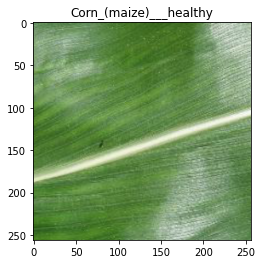

In [ ]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train_set:
    #print(image_batch[0].np.astype("uint8"))
    plt.imshow(image_batch[0])
    plt.title(class_name[int(label_batch[0])])
    break

Displaying image from train dataset

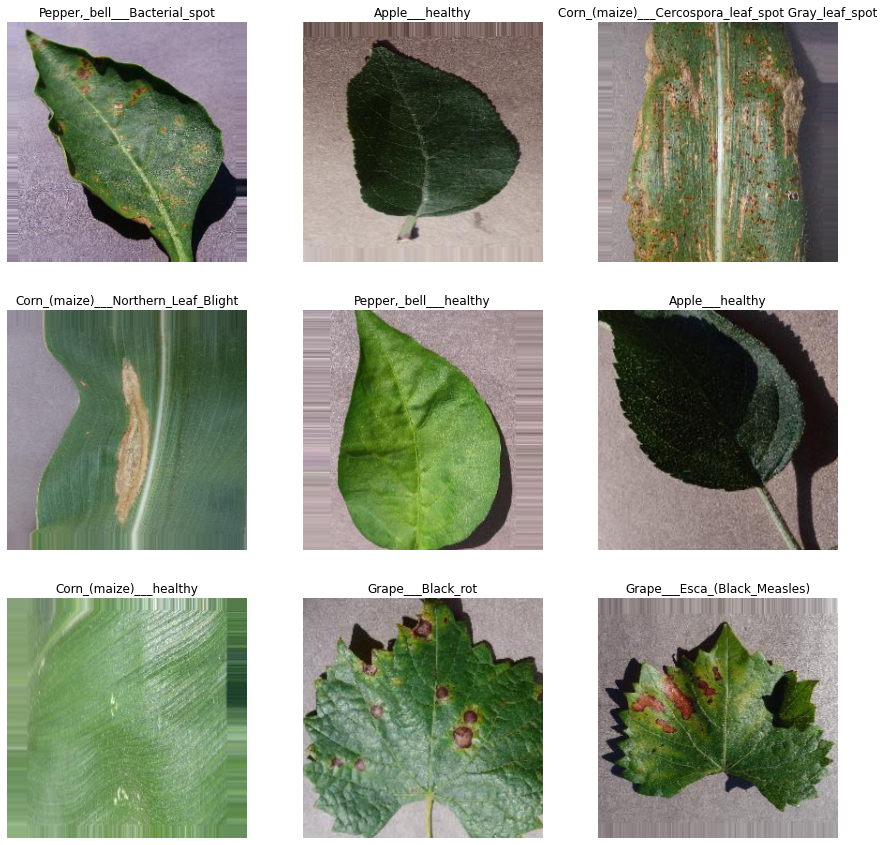

In [ ]:
plt.figure(figsize = (15,15))
for image_batch, label_batch in train_set:
    for i in range(9):
      plt.subplot(3,3, i + 1)
      plt.imshow(image_batch[i])
      plt.title(class_name[int(label_batch[i])])
      plt.axis('off')

    
    break

#Here the image is augumented image not the original image from dataset since we are here using image data generator

## Model building

In [ ]:
input_shape = (IMG_SIZE, IMG_SIZE, CHANNEL)
num_classes = len(class_name)

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
    
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

In [ ]:
#compile the model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
#fit the model
hist = model.fit(
    train_set,
    steps_per_epoch = len(train_set),
    epochs = 10,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_set,
    validation_steps = len(val_set)
)

Epoch 1/10
635/635 [==============================] - 7517s 12s/step - loss: 1.1266 - accuracy: 0.6518 - val_loss: 1.7033 - val_accuracy: 0.5515
Epoch 2/10
635/635 [==============================] - 1773s 3s/step - loss: 0.5499 - accuracy: 0.8115 - val_loss: 0.5452 - val_accuracy: 0.8210
Epoch 3/10
635/635 [==============================] - 1770s 3s/step - loss: 0.3961 - accuracy: 0.8635 - val_loss: 0.5179 - val_accuracy: 0.8286
Epoch 4/10
635/635 [==============================] - 1751s 3s/step - loss: 0.3194 - accuracy: 0.8908 - val_loss: 0.4147 - val_accuracy: 0.8687
Epoch 5/10
635/635 [==============================] - 1751s 3s/step - loss: 0.2823 - accuracy: 0.9045 - val_loss: 0.3365 - val_accuracy: 0.8818
Epoch 6/10
635/635 [==============================] - 1772s 3s/step - loss: 0.2386 - accuracy: 0.9127 - val_loss: 0.4023 - val_accuracy: 0.8742
Epoch 7/10
635/635 [==============================] - 1732s 3s/step - loss: 0.2305 - accuracy: 0.9223 - val_loss: 0.4568 - val_accuracy

Testing model on test dataset

In [ ]:
scores = model.evaluate(test_set)

183/183 [==============================] - 1762s 10s/step - loss: 0.3144 - accuracy: 0.9019


In [ ]:
scores

[0.31437548995018005, 0.9018531441688538]

Accuracy of the model is 90.18%

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

Visualising the traing and validation accuracy and loss over the epochs

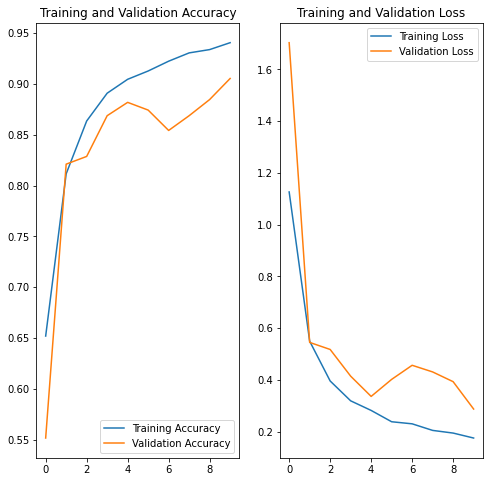

In [ ]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predicting the diseases and confidence

Actual diseases: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Predicited disease: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Confidence 99.53 %


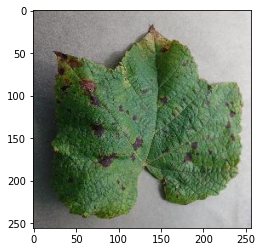

In [ ]:
for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = class_name[int(label_batch[0])]
    
    
    plt.imshow(first_image)
    print("Actual diseases:",first_label)
    
    batch_prediction = model.predict(image_batch)
    confidence = round(100 * (np.max(batch_prediction[0])), 2)
    print("Predicited disease:",class_name[np.argmax(batch_prediction[0])])
    print("Confidence", confidence , "%")
    
    break

In [ ]:
#saving the model
model.save('5_layer_cnn.h5')

### Loading the saved model 

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/leaf_data/5_layer_cnn.h5')

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
cls_name = ['Apple___Apple_scab',
            'Apple___Black_rot',
            'Apple___Cedar_apple_rust',
            'Apple___healthy',
            'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
            'Corn_(maize)___Northern_Leaf_Blight',
            'Corn_(maize)___healthy',
            'Grape___Black_rot',
            'Grape___Esca_(Black_Measles)',
            'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
            'Grape___healthy',
            'Pepper,_bell___Bacterial_spot',
            'Pepper,_bell___healthy',
            'Potato___Early_blight',
            'Potato___Late_blight',
            'Potato___healthy']

Predicting the diseases 

In [ ]:
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/leaf_data/test/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/038464d1-47a9-4169-afb1-72c87e568a95___RS_GLSp 4480.JPG') 
test_image = image.img_to_array(test_image)
x = test_image/255
test_image = np.expand_dims(x, axis = 0)

#predict the result
result = model.predict(test_image)
print("Predicited disease:", cls_name[np.argmax(result[0])])
print(result)
    

Predicited disease: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
[[2.0731064e-11 3.5378886e-13 2.1336359e-12 2.2487179e-15 9.9880695e-01
  1.1930721e-03 3.1404797e-14 2.4648241e-12 8.2535992e-15 2.4368865e-10
  4.8656515e-20 6.5176873e-15 7.1518109e-15 2.4351594e-09 3.5686762e-14
  8.1067234e-22]]
